In [1]:
import ROOT

f1 = ROOT.TFile.Open("B2HHH_MagnetUp.root")
treeUp = f1.Get("DecayTree")

f2 = ROOT.TFile.Open("B2HHH_MagnetDown.root")
treeDown = f2.Get("DecayTree")

/bin/bash: /home/jjpereirab/miniconda/envs/root_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Welcome to JupyROOT 6.24/06


In [45]:
treeUp.Print()

******************************************************************************
*Tree    :DecayTree : Tree continaing data for B- --> h-h+h- decays          *
*Entries :  3420295 : Total =       629522894 bytes  File  Size =  444718406 *
*        :          : Tree compression factor =   1.42                       *
******************************************************************************
*Br    0 :B_FlightDistance : B_FlightDistance/D                              *
*Entries :  3420295 : Total  Size=   27370973 bytes  File Size  =   24630500 *
*Baskets :       72 : Basket Size=    1873408 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :B_VertexChi2 : B_VertexChi2/D                                      *
*Entries :  3420295 : Total  Size=   27370661 bytes  File Size  =   24812127 *
*Baskets :       72 : Basket Size=    1873408 bytes  Compression=   1.04     *
*...................................................

## Trying to merge both trees

MERGING TREES https://root-forum.cern.ch/t/merging-ttrees-on-the-fly/1833

In [26]:
lista = ROOT.TList()

lista.Add(tree1)
lista.Add(tree2)

newtree = ROOT.TTree.MergeTrees(lista)

Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <TBranch::WriteBasketImpl>: basket's WriteBuffer failed.
Error in <

In [27]:
newtree.Print()

******************************************************************************
*Tree    :DecayTree : Tree continaing data for B- --> h-h+h- decays          *
*Entries :  8556118 : Total =       246904747 bytes  File  Size =    5830697 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :B_FlightDistance : B_FlightDistance/D                              *
*Entries :  8556118 : Total  Size=   10729817 bytes  All baskets in memory   *
*Baskets :       36 : Basket Size=    1873408 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :B_VertexChi2 : B_VertexChi2/D                                      *
*Entries :  8556118 : Total  Size=   10729633 bytes  All baskets in memory   *
*Baskets :       36 : Basket Size=    1873408 bytes  Compression=   1.00     *
*...................................................

In [31]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",600,450)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


Getting an error when trying to fill the histogram, merged tree doesn't work

--------------

### Preselection kaons

In [2]:
entries = 0
prob_pi = 0.5
prob_ka = 0.5

for event in treeUp:  
#     H1_PX = treeUp.H1_PX;    H1_PY = treeUp.H1_PX;    H1_PZ = treeUp.H1_PX
#     H1_PX = treeUp.H1_PX;    H1_PY = treeUp.H1_PX;    H1_PZ = treeUp.H1_PX
#     H1_PX = treeUp.H1_PX;    H1_PY = treeUp.H1_PX;    H1_PZ = treeUp.H1_PX
    
    if not (treeUp.H1_isMuon == 0 and treeUp.H2_isMuon == 0 and treeUp.H3_isMuon == 0): continue
    if not (treeUp.H1_ProbPi < prob_pi and treeUp.H2_ProbPi < prob_pi and treeUp.H3_ProbPi < prob_pi): continue
    if not (treeUp.H1_ProbK  > prob_ka and treeUp.H2_ProbK  > prob_ka and treeUp.H3_ProbK  > prob_ka): continue
    
    entries += 1
    
entries

9717

In [3]:
for event in treeDown:  
#     H1_PX = treeDown.H1_PX;    H1_PY = treeDown.H1_PX;    H1_PZ = treeDown.H1_PX
#     H1_PX = treeDown.H1_PX;    H1_PY = treeDown.H1_PX;    H1_PZ = treeDown.H1_PX
#     H1_PX = treeDown.H1_PX;    H1_PY = treeDown.H1_PX;    H1_PZ = treeDown.H1_PX
    
    if not (treeDown.H1_isMuon == 0 and treeDown.H2_isMuon == 0 and treeDown.H3_isMuon == 0): continue
    if not (treeDown.H1_ProbPi < prob_pi and treeDown.H2_ProbPi < prob_pi and treeDown.H3_ProbPi < prob_pi): continue
    if not (treeDown.H1_ProbK  > prob_ka and treeDown.H2_ProbK  > prob_ka and treeDown.H3_ProbK  > prob_ka): continue
    
    entries += 1

In [4]:
entries

23895

In [33]:
hist = 0
hist = ROOT.TH1F("mu_average","average interactions per bunch-crossing; mu_average; Events",100,-1,13) # (bins, x_min, x_max)

# for event in range(102900):               # THIS ISN'T THE SAME
#     hist_mu.Fill(tree.mu_average)         # EACH ITERATION CHANGES tree.mu_average, NOT SURE HOW

for event in tree1:                          # THIS HAPPENS 102900 TIMES
    hist.Fill(tree1.B_VertexChi2)

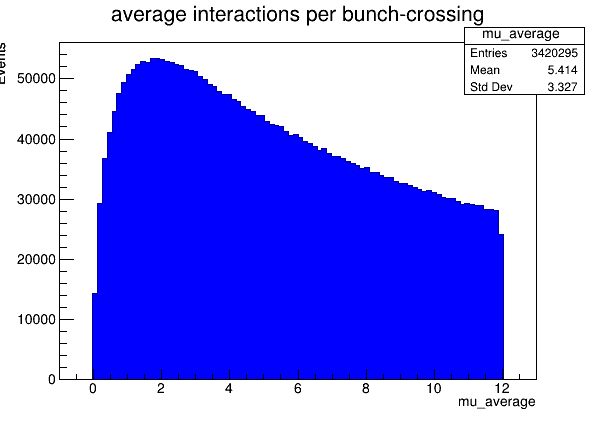

In [36]:
hist.SetFillColor(4)
hist.Draw()
canvas.Draw()